# **Submission Dicoding Belajar Machine Learning Untuk Pemula**

Kriteria yang harus dipenuhi pada program :
- Dataset harus dibagi menjadi train set dan validation set.
- Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
- Harus mengimplementasikan augmentasi gambar.
- Menggunakan image data generator.
- Model harus menggunakan model sequential.
- Pelatihan model tidak melebihi waktu 30 menit.
- Program dikerjakan pada Google Colaboratory.
- Akurasi dari model minimal 85%.
- Dapat memprediksi gambar yang diunggah ke Colab

Nama : Siti Marliana
Dicoding Indonesia


# ** Rock, Paper & Scissors dengan TensorFlow **

**1. Import Library TensorFlow, Keras dan Masukkan Dataset**

Masukan library model Deep Learning yang dipilih. Masukan layer, model, praproses gambar, dan optimasi pada metode Convolutional Neural Network.

Dataset yang didapat adalah yang sudah disediakan oleh Dicoding

In [1]:
#import tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

#Print tensorflow version
print(tf.__version__)

2.4.1


In [2]:
#download dataset
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-05-01 15:41:50--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M   754KB/s    in 4m 11s  

2021-05-01 15:46:02 (1.23 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



 **2. Setup dan Import Library & Memisahkan Data Latih dan Validasi**

Masukan library model Deep Learning yang dipilih. Masukan layer, model, praproses gambar, dan optimasi pada metode Convolutional Neural Network.

Dataset yang didapat adalah yang sudah disediakan oleh Dicoding

Langkah selanjutnya adalah memisahkan data menjadi 2 bagian yaitu Data Train(Latih) dan Data Validasi dengan rasio yang diinginkan (60:40).

Dengan menguji model, kita dapat melihat kesalahan yang dibuat dan memperbaikinya sebelum mulai membawa model kita ke tahap selanjutnya

In [3]:
#Install split folders
!pip install split_folders

In [4]:
#Memisahkan data latih dan validasi
#Import zipfiles,os dan splitfolder
import zipfile,os
import splitfolders

local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('rps')
zip_ref.close()

splitfolders.ratio('rps/rockpaperscissors/rps-cv-images', output="rps/rockpaperscissors/data", seed=1337, ratio=(.6, .4))
#splitfolders.fixed('rps/rockpaperscissors/rps-cv-images', output="rps/rockpaperscissors/data", seed=1337, fixed=(100, 100), oversample=False, group_prefix=None)


data_dir = 'rps/rockpaperscissors/data'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'val')

os.listdir('rps/rockpaperscissors/data/train')
os.listdir('rps/rockpaperscissors/data/val')

Copying files: 2188 files [00:00, 2352.96 files/s]


['rock', 'paper', 'scissors']

In [5]:
print(len(os.listdir('rps/rockpaperscissors/paper')))
print(len(os.listdir('rps/rockpaperscissors/scissors')))
print(len(os.listdir('rps/rockpaperscissors/rock')))

712
750
726


In [6]:
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_rock_dir = os.path.join(train_dir, 'rock')

validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_rock_dir = os.path.join(validation_dir, 'rock')

In [7]:
paper_imgs = os.listdir(train_paper_dir)
scissors_imgs = os.listdir(train_scissors_dir)
rock_imgs = os.listdir(train_rock_dir)

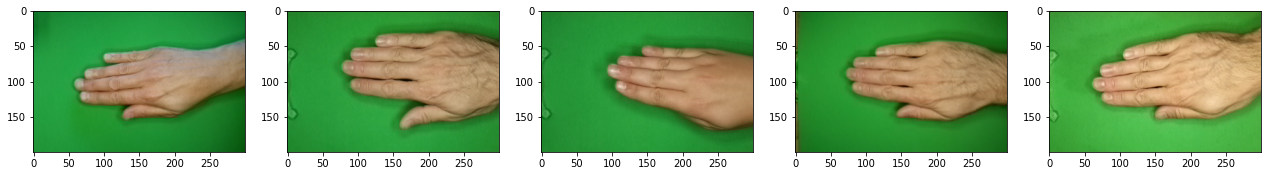

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(22, 5))
for i, img_path in enumerate(paper_imgs[:5]):
  sp = plt.subplot(1, 5, i+1)
  img = mpimg.imread(os.path.join(train_paper_dir, img_path))
  plt.imshow(img)
plt.show()


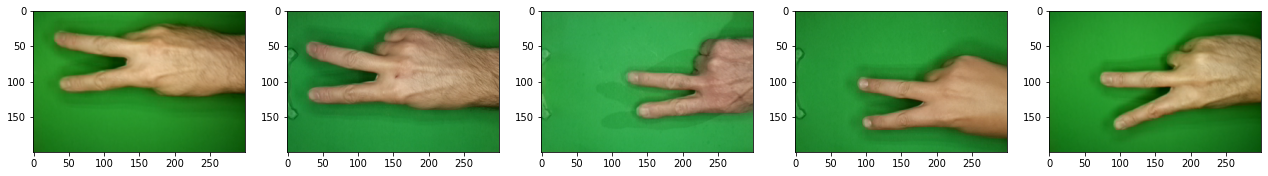

In [9]:
plt.figure(figsize=(22, 5))
for i, img_path in enumerate(scissors_imgs[:5]):
  sp = plt.subplot(1, 5, i+1)
  img = mpimg.imread(os.path.join(train_scissors_dir, img_path))
  plt.imshow(img)
plt.show()

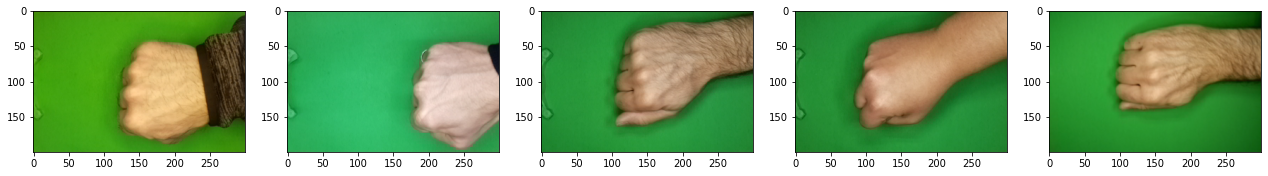

In [10]:
plt.figure(figsize=(22, 5))
for i, img_path in enumerate(rock_imgs[:5]):
  sp = plt.subplot(1, 5, i+1)
  img = mpimg.imread(os.path.join(train_rock_dir, img_path))
  plt.imshow(img)
plt.show()

**3. Augmentasi Data Gambar**

Augmentasi data gambar menggunakan metode ImageDataGenerator. Augmentasi data gambar berfungsi untuk menambahkan dataset gambar dengan cara memperbesar gambar, memotong gambar, dan memanipulasi gambar namun tanpa menghilangkan inti dari data tersebut.

In [11]:
#Augmentasi data gambar
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.9999, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.9999)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (100, 100),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True
)

valid_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (100, 100),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True,
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [13]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [14]:
valid_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

**4. Melatih sebuah model Convolutional Neural Network**

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        1

**5. Kompilasi Model & Alur Pelatihan**

Metode selanjutnya menggunakan model yang akan dikompilasi. Penggunaan model ini agar menentukan optimasi dari model dataset tadi. Setelah menentukan pengoptimalan model dilanjutkan dengan penggunaan loss pada fungsi CNN dengan kelas dataset yang digunakan.

Untuk klasifikasi biner menggunakan binary_crossentropy dan untuk klasifikasi multi kelas menggunakan categorical_crossentropy dan kemudian menentukan metrik akurasi untuk mengevaluasi model yang dibuat.

In [16]:
#Kompilasi model dan alur pelatihan

model.compile(loss = 'categorical_crossentropy',
              optimizer= 'RMSprop', 
              metrics= ['accuracy'])

In [17]:
historyku = model.fit(train_generator, 
          steps_per_epoch=25, 
          epochs=20, 
          validation_data=valid_generator,
          validation_steps=5,
          verbose=2)

Epoch 1/20
25/25 - 14s - loss: 1.1422 - accuracy: 0.4313 - val_loss: 1.0441 - val_accuracy: 0.4625
Epoch 2/20
25/25 - 12s - loss: 0.9063 - accuracy: 0.5825 - val_loss: 0.9377 - val_accuracy: 0.6000
Epoch 3/20
25/25 - 12s - loss: 0.6764 - accuracy: 0.7625 - val_loss: 0.5147 - val_accuracy: 0.8625
Epoch 4/20
25/25 - 12s - loss: 0.4397 - accuracy: 0.8413 - val_loss: 0.4373 - val_accuracy: 0.9000
Epoch 5/20
25/25 - 12s - loss: 0.2682 - accuracy: 0.8963 - val_loss: 0.2350 - val_accuracy: 0.9438
Epoch 6/20
25/25 - 12s - loss: 0.3076 - accuracy: 0.8863 - val_loss: 0.2840 - val_accuracy: 0.9125
Epoch 7/20
25/25 - 12s - loss: 0.1958 - accuracy: 0.9388 - val_loss: 0.2295 - val_accuracy: 0.9438
Epoch 8/20
25/25 - 12s - loss: 0.2366 - accuracy: 0.9112 - val_loss: 0.2429 - val_accuracy: 0.9375
Epoch 9/20
25/25 - 12s - loss: 0.1310 - accuracy: 0.9575 - val_loss: 0.1106 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 12s - loss: 0.2094 - accuracy: 0.9237 - val_loss: 0.2730 - val_accuracy: 0.8938
Epoch 11/

**6. Plot Kurva Data Latih dan Validasi**

Kemudian, kita tampilkan plot kurva hasil apakah data sudah cocok ataupun bisa terjadi overfitting dan underfitting.

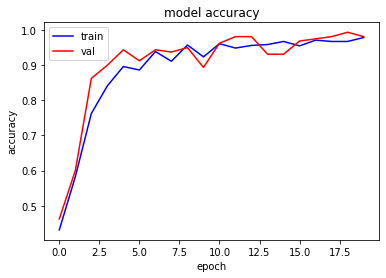

<function matplotlib.pyplot.show>

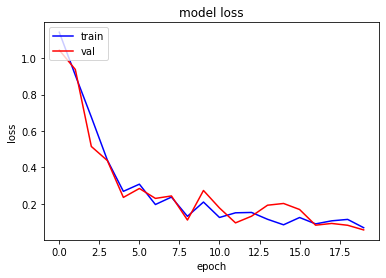

In [18]:
#Plot kurva data latih dan validasi
import matplotlib.pyplot as plt

acc = historyku.history['accuracy']
val_acc = historyku.history['val_accuracy']

loss = historyku.history['loss']
val_loss = historyku.history['val_loss']

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show

**7. Memprediksi Model Data yang ada dengan Upload Gambar**

Setelah kita mengetahui hasil data tersebut berdasarkan akurasi pada model data. Maka, kita bisa gunakan "upload image" dari Google Colab untuk memprediksi model data yang telah di klasifikasi.

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png
0ePX1wuCc3et7leL.png
Scissors


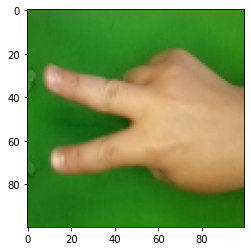

In [19]:
#Memprediksi Model Data yang ada dengan Upload Gambar

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

    path = fn
    img = image.load_img(path, target_size=(100,100))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    images = np.vstack([x])
    classes = model.predict(images, batch_size=32)
  
    print(fn)
    if classes[0,0] == 1.0:
      print('Paper')
    elif classes[0,1] == 1.0:
      print('Rock')
    else:
      print('Scissors')
